# Lab 2 31.01.2017

## Clustering coefficient

During the lecture we have understood, that the clustering coefficient of a random graph is equal to the probability $p$: $$\text{Clustering coefficient} = \frac{\langle k \rangle}{n} = p $$
In this task you have to check it on generated data. Please, generate $100$ Random Graphs with $n = 1000$ and $p = 0.002$ (for saving computational time) and plot the box-plot of your computations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

The first step of this exercise is generating 100 Random Graphs with $n = 1000$ and $p = 0.002$. This part was done using a standard function *fast_gnp_random_graph* which suits for graphs with small p.

The second step is calculating clustering coefficient. It was done using a standard function *average_clustering* which calculates average clustering coefficient of the graph.

Finally, boxplot was plotted. It shows all clustering coefficients of 100 generated graphs.

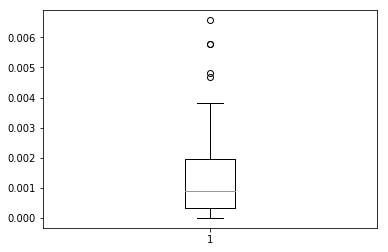

In [49]:
cc = []
for i in range(100):
    v = 0
    cl = nx.average_clustering(nx.fast_gnp_random_graph(1000, 0.002))
    #rg.append(nx.fast_gnp_random_graph(1000, 0.002))
    cc.append(float(cl))
#print(float(cc)/float(1000))
plt.boxplot(cc)
plt.show()

It can be seen from the picture above that the median of this sample (approximately, 0.001) is smaller than expected value (0.002). It can be explained by the fact that n is not close to infinity for these graphs.

## Size of small components

In this task you are asked to calculate the average size of small components (small component = not a giant one) with regard to average degree of the network. To see the effect clearly, plot average size around $\langle k \rangle = 1$.



The first step of this exercise is defining parameters of graphs. Since $\langle k \rangle$ should be around $\langle k \rangle = 1$ the list of 8 values around this value was generated. 

The second step is generating Random Graphs with parameters: $n = 1000$, $p = \frac {\langle k \rangle}{n-1}$.

The third step is finding all connected components of these graphs, sorting them and calculating the size of the smallest ones.

Finally, the graph was plotted.

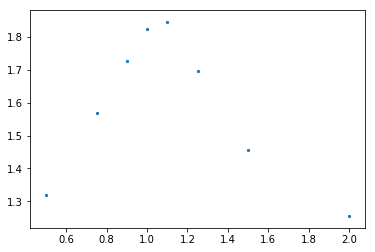

In [50]:
kset = [0.5, 0.75, 0.9, 1.0, 1.1, 1.25, 1.5, 2.0]
deg = []
for i in range(len(kset)):
    siz = 0
    for j in range(100):
        nod = 0
        gr = nx.fast_gnp_random_graph(1000, float(kset[i])/(1000-1))
        cc = sorted(nx.connected_component_subgraphs(gr), key=len)
        for k in range(len(cc)-1):
            nod = nod + nx.number_of_nodes(cc[k])
        siz = siz + float(nod)/(len(cc)-1)
    deg.append(float(siz)/100)
plt.scatter(kset, deg, s=5)
plt.show()

It can be seen from the plot above that distribution is close to normal or Poisson. Before $\langle k \rangle = 1$ the dependence is close to linear, but after $\langle k \rangle = 1$ the dependence becomes exponential-like.

To observe phase-transition the dependency of size of the giant component from the $\langle k \rangle$ was plotted.

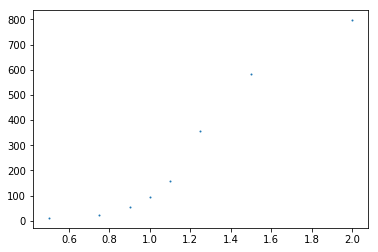

In [37]:
kset = [0.5, 0.75, 0.9, 1.0, 1.1, 1.25, 1.5, 2.0]
deg = []
for i in range(len(kset)):
    siz = 0
    for j in range(100):
        nod = 0
        gr = nx.fast_gnp_random_graph(1000, float(kset[i])/(1000-1))
        cc = max(nx.connected_component_subgraphs(gr), key=len)
        nod = nod + nx.number_of_nodes(cc)
        siz = siz + float(nod)
    deg.append(float(siz)/100)
plt.scatter(kset, deg, s=1)
plt.show()

It can be seen that the theoretical fact was confirmed. Before $\langle k \rangle = 1$ the size of the giant component is close to zero, but after $\langle k \rangle = 1$ the character of dependency changes significantly.

## Average path length and transitivity

Plot the average path length and transitivity coefficents with $n=1000$ and p=0.001 while increasing by 0.003

The first step of plotting the average transitivity coefficients is defining parameters of graphs. The list of $p$ values from 0.001 to 0.003 was defined.

The second step is generating 100 graphs for every value from the list.

The third step is calculating average clustering coefficients over these 100 graphs for every value from the list.

And the final step is plotting the dependency.

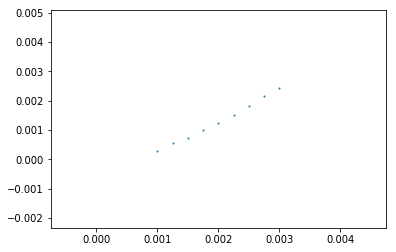

In [40]:
pset = [0.001, 0.00125, 0.0015, 0.00175, 0.002, 
        0.00225, 0.0025, 0.00275, 0.003]
degP = []
for i in range(len(pset)):
    siz = 0.0
    for j in range(100):
        gr = nx.fast_gnp_random_graph(1000, pset[i])
        cc = nx.average_clustering(gr)
        siz = siz + float(cc)
    degP.append(float(siz)/100)
plt.scatter(pset, degP, s=1)
plt.show()

It can be seen that the character of dependency is close to linear.

The first step of plotting the average path length is defining parameters of graphs. The list of  $p$  values from 0.001 to 0.003 was defined.

The second step is generating 10 graphs for every value from the list.

The third step is calculating average path length over all nodes of the giant connected component.

The fourth step is calculating average value of all 10 average path lengths over these 10 graphs for every value from the list.

Ant the final step is plotting the dependency.

In [43]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

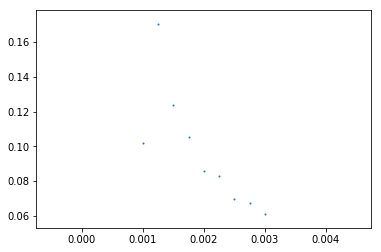

In [45]:
pset = [0.001, 0.00125, 0.0015, 0.00175, 0.002, 
        0.00225, 0.0025, 0.00275, 0.003]
degP = []
for i in range(len(pset)):
    siz = 0.0
    for j in range(10):
        gr = nx.fast_gnp_random_graph(1000, pset[i])
        paths = nx.all_pairs_shortest_path_length(
            max(nx.connected_component_subgraphs(gr), key=len
               ), cutoff=None)
        lens = []
        for k in range(len(paths.values())):
            for h in range(len(paths.values()[k])):
                d=paths.values()[k]
                lens.append(d.values()[h])
        lens = [x for x in lens if x!=0]
        siz = mean(lens)
    degP.append(float(siz)/100)
plt.scatter(pset, degP, s=1)
plt.show()

It can be seen that the character of dependency is close to Poisson.